# PolitiFact Web Scraping

Extracting data from PolitiFact involves several steps. Here's a general outline of the process:

## 1. Scrape the List of Politicians
- Write a script that navigates to each politician on the listing page (e.g. https://www.politifact.com/personalities/).
- Extract the names, affiliation category (Republican, Democrat, Independent) and corresponding URLs of each politician. 

In [75]:
import os
import pandas as pd

current_directory = os.getcwd()

file_path = current_directory + '/Data/pol_dff20231229.csv'

df = pd.read_csv(file_path)


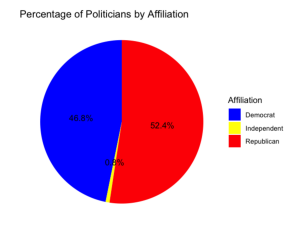

In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = 'byAffiliatation.png'

img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [51]:
print("A total of", len(df), "claims were made by", df['ssc'].nunique(),"politicians")

A total of 13809 claims were made by 2521 politicians


## 2. Iterate Over Each Politician
- For each politician, navigate to their specific page (e.g. https://www.politifact.com/factchecks/list/?page=1&speaker=joe-biden).
- Extract the required information about each claim. This would typically include:
    * The politician who made the claim
    * The claim itself
    * The veracity of the claim (e.g., True, False, Half-True), which is often presented alongside the claim
    * The date of the claim
    * The setting of the claim (e.g. during an interview, at a press conference or in a social media post)
- Handle pagination if a politician has claims spread over multiple pages.

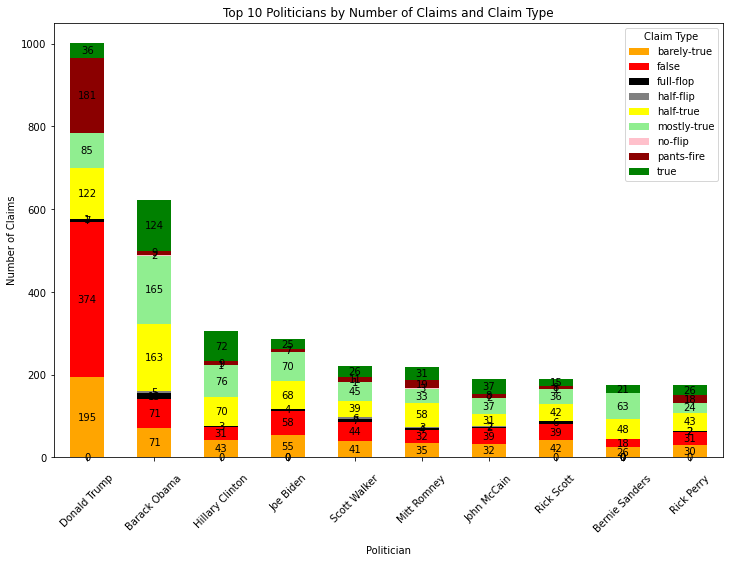

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Define color mapping for claim types
color_mapping = {
    'true': 'green',
    'mostly-true': 'lightgreen',
    'half-true': 'yellow',
    'barely-true': 'orange',
    'false': 'red',
    'pants-fire': 'darkred',
    'half-flip': 'grey',
    'no-flip': 'pink',
    'full_flop': 'lightgrey'
}
default_color = 'black'




# Count claims per politician and claim type
claim_counts = df.groupby(['ssc', 'type']).size().reset_index(name='counts')

# Find the top 10 politicians based on total number of claims
top_politicians = claim_counts.groupby('ssc')['counts'].sum().nlargest(10).index

# Filter the data to include only top 10 politicians
top_politicians_data = claim_counts[claim_counts['ssc'].isin(top_politicians)]

# Pivot the data for plotting
pivot_data = top_politicians_data.pivot(index='ssc', columns='type', values='counts').fillna(0)

# Ordering the politicians by total number of claims
ordered_politicians = pivot_data.sum(axis=1).sort_values(ascending=False).index
ordered_pivot_data = pivot_data.loc[ordered_politicians]

# Plotting
ax = ordered_pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), 
                             color=[color_mapping.get(x, default_color) for x in ordered_pivot_data.columns])
plt.xlabel('Politician')
plt.ylabel('Number of Claims')
plt.title('Top 10 Politicians by Number of Claims and Claim Type')
plt.xticks(rotation=45)
plt.legend(title='Claim Type')

# Adding the numbers on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.show()


### Distribution of claim types

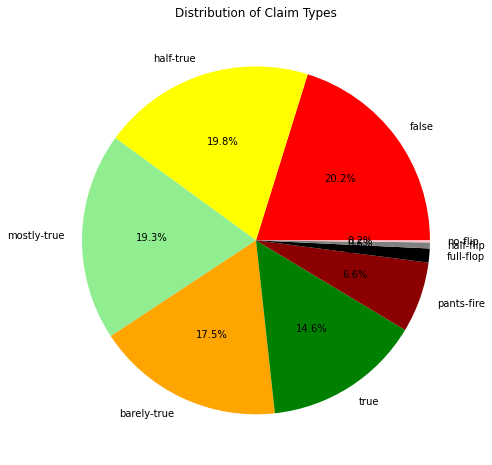

In [80]:
import pandas as pd
import matplotlib.pyplot as plt


# Define color mapping for claim types
color_mapping = {
    'true': 'green',
    'mostly-true': 'lightgreen',
    'half-true': 'yellow',
    'barely-true': 'orange',
    'false': 'red',
    'pants-fire': 'darkred',
    'half-flip': 'grey',
    'no-flip': 'pink',
    'full_flop': 'lightgrey'
}
default_color = 'black'

# Count the occurrences of each claim type
claim_type_counts = df['type'].value_counts()

# Get colors for each claim type in the pie chart
colors = [color_mapping.get(claim_type, default_color) for claim_type in claim_type_counts.index]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(claim_type_counts, labels=claim_type_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Claim Types')
plt.show()

